Basic import statements for the project

In [1]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
#glob is useful for working with filepaths
import glob
import math
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import re
from sklearn.cluster import KMeans

1. Function for returning a list of filenames for the dance data

In [2]:
def get_file_list():
    #Saving all of the filepaths in data
    data = []
    for folder in glob.glob("../data/*"):
        if (folder[-3:] != '.md' and folder[-6:] != '.ipynb'):
            #print(glob.glob(folder+'/*')[0])
            data.append(glob.glob(folder+'/*')[0])
    return data
        
files = get_file_list()

The following cell defines the columns for our data.

In [3]:
data_columns = ['head_x', 'head_y', 'head_z',
               'neck_x', 'neck_y', 'neck_z',
               'spine_x', 'spine_y', 'spine_z',
               'hip_x', 'hip_y', 'hip_z',
               'shoulderl_x', 'shoulderl_y', 'shoulderl_z',
               'shoulderr_x', 'shoulderr_y', 'shoulderr_z',
               'elbowl_x', 'elbowl_y', 'elbowl_z',
               'elbowr_x', 'elbowr_y', 'elbowr_z',
               'wristl_x', 'wristl_y', 'wristl_z',
               'wristr_x', 'wristr_y', 'wristr_z',
               'handl_x', 'handl_y', 'handl_z',
               'handr_x', 'handr_y', 'handr_z',
               'handtipl_x', 'handtipl_y', 'handtipl_z',
               'handtipr_x', 'handtipr_y', 'handtipr_z',
               'hipl_x', 'hipl_y', 'hipl_z',
               'hipr_x', 'hipr_y', 'hipr_z',
               'kneel_x', 'kneel_y', 'kneel_z',
               'kneer_x', 'kneer_y', 'kneer_z',
               'anklel_x', 'anklel_y', 'anklel_z',
               'ankler_x', 'ankler_y', 'ankler_z',
               'footl_x', 'footl_y', 'footl_z',
               'footr_x', 'footr_y', 'footr_z']

In [24]:
array2d = []
    
#opening file
fp = open('../data/BadGuy_BillieEilish1/2Fxmhks0bxGSBdJ92vM42m_date12_20_BadGuy-BillieEilish_2.txt', 'r')
line = fp.readline()

#find first line with all data points accounted for
lineno = 0
while line:
    frame = line.split()
    for i in range(len(frame)):
        frame[i] = abs(float(frame[i]))
    print(lineno, min(frame))
    line = fp.readline()
    lineno += 1

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
138 0.

1341 0.0
1342 0.0
1343 0.0
1344 0.0
1345 0.0
1346 0.0
1347 0.0
1348 0.0
1349 0.0
1350 0.0
1351 0.0
1352 0.0
1353 0.0
1354 0.0
1355 0.0
1356 0.0
1357 0.0
1358 0.0
1359 0.0
1360 0.0
1361 0.0
1362 0.0
1363 0.0
1364 0.0
1365 0.0
1366 0.0
1367 0.0
1368 0.0
1369 0.0
1370 0.0
1371 0.0
1372 0.0
1373 0.0
1374 0.0
1375 0.0
1376 0.0
1377 0.0
1378 0.0
1379 0.0
1380 0.0
1381 0.0
1382 0.0
1383 0.0
1384 0.0
1385 0.0
1386 0.0
1387 0.0
1388 0.0
1389 0.0
1390 0.0
1391 0.0
1392 0.0
1393 0.0
1394 0.0
1395 0.0
1396 0.0
1397 0.0
1398 0.0
1399 0.0
1400 0.0
1401 0.0
1402 0.0
1403 0.0
1404 0.0
1405 0.0
1406 0.0
1407 0.0
1408 0.0
1409 0.0
1410 0.0
1411 0.0
1412 0.0
1413 0.0
1414 0.0
1415 0.0
1416 0.0
1417 0.0
1418 0.0
1419 0.0
1420 0.0
1421 0.0
1422 0.0
1423 0.0
1424 0.0
1425 0.0
1426 0.0
1427 0.0
1428 0.0
1429 0.0
1430 0.0
1431 0.0
1432 0.0
1433 0.0
1434 0.0
1435 0.0
1436 0.0
1437 0.0
1438 0.0
1439 0.0
1440 0.0
1441 0.0
1442 0.0
1443 0.0
1444 0.0
1445 0.0
1446 0.0
1447 0.0
1448 0.0
1449 0.0
1450 0.0
1451 0.0
1

2466 0.0148536
2467 0.0469848
2468 0.0383927
2469 0.0274076
2470 0.020517
2471 0.020517
2472 0.0172599
2473 0.0152828
2474 0.0146093
2475 0.0152247
2476 0.0164503
2477 0.0178836
2478 0.0180836
2479 0.0151724
2480 0.0144362
2481 0.0146837
2482 0.0136754
2483 0.013774
2484 0.0140652
2485 0.0143528
2486 0.0145922
2487 0.0146066
2488 0.0131761
2489 0.0113851
2490 0.0110829
2491 0.0110829
2492 0.0110411
2493 0.0122008
2494 0.0139715
2495 0.0163596
2496 0.0207863
2497 0.0190372
2498 0.0179126
2499 0.0078152
2500 0.0141928
2501 0.00739358
2502 0.00953805
2503 0.00177546
2504 0.013688
2505 0.0151258
2506 0.00552836
2507 0.00255119
2508 0.00599234
2509 0.0201344
2510 0.0226362
2511 0.0243994
2512 0.0228184
2513 0.0012119
2514 0.0160586
2515 0.0126375
2516 0.012454
2517 0.0142989
2518 0.0182654
2519 0.00816774
2520 0.00252857
2521 0.00429915
2522 0.00314507
2523 0.00281646
2524 0.00273307
2525 0.00221251
2526 0.000280937
2527 0.00471189
2528 0.011904
2529 0.00301791
2530 0.0101962
2531 0.0107887

3190 0.00739351
3191 0.0144579
3192 0.00882389
3193 0.00712887
3194 0.00529233
3195 0.00345104
3196 0.0011816
3197 0.00131787
3198 0.000342691
3199 0.00360629
3200 0.0027851
3201 0.00337262
3202 0.00274001
3203 0.00294453
3204 0.00294453
3205 0.000527613
3206 0.0071636
3207 0.00586976
3208 0.0126206
3209 0.0194031
3210 0.0154617
3211 0.013083
3212 0.0115079
3213 0.00674709
3214 0.00124878
3215 0.010949
3216 0.0106614
3217 0.00669187
3218 0.00323485
3219 0.00115471
3220 0.000286927
3221 0.000932055
3222 0.00038485
3223 0.00170413
3224 0.0043268
3225 0.00703783
3226 0.0091969
3227 0.0107057
3228 0.00694355
3229 0.0031587
3230 0.00242324
3231 0.0134386
3232 0.00581248
3233 0.000128592
3234 0.00426856
3235 0.00689558
3236 0.00858135
3237 0.00929258
3238 0.00722349
3239 0.0019911
3240 0.000636354
3241 0.00157129
3242 0.002211
3243 0.00035413
3244 0.000795109
3245 0.000779378
3246 0.00139634
3247 0.00205123
3248 0.00746523
3249 0.00931135
3250 0.0102587
3251 0.00099512
3252 0.00231962
3253 0

3871 0.00125754
3872 9.60862e-05
3873 0.00467764
3874 0.00554191
3875 0.00243765
3876 0.000562347
3877 0.000200653
3878 4.17332e-05
3879 0.00097
3880 0.000745447
3881 0.00349365
3882 0.00530676
3883 0.00609092
3884 0.00598864
3885 0.00498821
3886 0.00322219
3887 0.00148058
3888 0.000430056
3889 0.00108314
3890 0.000594324
3891 0.00132056
3892 0.000389312
3893 0.00352752
3894 0.00648303
3895 0.00972514
3896 0.00332651
3897 0.00963237
3898 0.0114427
3899 0.00534772
3900 0.00534772
3901 0.00307092
3902 0.00183482
3903 0.00100272
3904 0.00277664
3905 0.00128789
3906 0.00219569
3907 0.000330138
3908 0.000661572
3909 0.00249824
3910 0.00377993
3911 0.00138353
3912 0.000156378
3913 0.000376821
3914 0.00144832
3915 0.00413948
3916 0.0035062
3917 0.00428537
3918 0.00478595
3919 0.00164153
3920 0.00397211
3921 0.00532738
3922 0.00093561
3923 0.00416571
3924 0.00539616
3925 0.00160308
3926 0.00367187
3927 0.000937421
3928 0.00171932
3929 0.00294595
3930 0.00477432
3931 0.00337205
3932 0.00332501


4756 0.0
4757 0.0
4758 0.0
4759 0.0
4760 0.0
4761 0.0
4762 0.0
4763 0.0
4764 0.0
4765 0.0
4766 0.0
4767 0.0
4768 0.0
4769 0.0
4770 0.0
4771 0.0
4772 0.0
4773 0.0
4774 0.0
4775 0.0
4776 0.0
4777 0.0
4778 0.0
4779 0.0
4780 0.0
4781 0.0
4782 0.0
4783 0.0
4784 0.0
4785 0.0
4786 0.0
4787 0.0
4788 0.0
4789 0.0


In [56]:
def create_df(filename):
    array2d = []
    
    #opening file
    fp = open(filename, 'r')
    line = fp.readline()
    
    #find first line with all data points accounted for
    #this serves to skip any frames where the square_handtip_distance would be improperly calculated
    frame_min = 0
    #this tracks how many lines are skipped so the df index lines up with the line number of the txt files
    lineno = 0
    while frame_min == 0:
        frame = line.split()
        for i in range(len(frame)):
            frame[i] = abs(float(frame[i]))
        line = fp.readline()
        frame_min = min(frame)
        lineno += 1
        

    #parsing lines of txt file
    while line:
        frame = line.split()
        for i in range(len(frame)):
            frame[i] = float(frame[i])
        array2d.append(frame)
        line = fp.readline()

    #inputting file into dataframe
    df = pd.DataFrame(array2d, columns = data_columns)
    #adjusting df index to line up with txt files
    df.index += lineno

    #defining distance between handtips
    df["square_handtip_distance"] = (df['handtipl_x'] - df['handtipr_x'])**2 + (df['handtipl_y'] - df['handtipr_y'])**2 + (df['handtipl_z'] - df['handtipr_z'])**2
    
    non_zero = df[df["square_handtip_distance"] > 0]
    #currently is just an estimation, taking the first frame where the hand distance is less than 0.1
    clap_frame = df[df["square_handtip_distance"] < 0.01].index[0].copy()
    #add columns for time stamp and beat index
    df["time_stamp"] = 0
    df["beat_index"] = 0
    clap_onwards = df.iloc[clap_frame:]
    clap_onwards
    return df, clap_frame

In [57]:
clap, frame = create_df('../data/1999_CharliXCX/05mAIVLkIWc2d1UBYZBCp8_date12_20_1999_CharliXCX_2.txt')
clap

,head_x,head_y,head_z,neck_x,neck_y,neck_z,spine_x,spine_y,spine_z,hip_x,...,ankler_z,footl_x,footl_y,footl_z,footr_x,footr_y,footr_z,square_handtip_distance,time_stamp,beat_index
266,1.44656,0.759382,2.57761,1.46506,0.644114,2.55636,1.45766,0.356334,2.58045,1.44581,...,2.52808,1.52445,-0.467852,2.48383,1.47174,-0.529185,2.51154,0.056301,0,0
267,1.44656,0.771473,2.58713,1.46506,0.660505,2.57571,1.45766,0.375803,2.59565,1.44581,...,2.52808,1.54324,-0.467852,2.48383,1.47174,-0.544779,2.51258,0.067281,0,0
268,1.43721,0.771473,2.58713,1.45178,0.660505,2.57571,1.44007,0.375803,2.59565,1.42300,...,2.53864,1.51082,-0.497929,2.53470,1.45816,-0.544779,2.51258,0.081767,0,0
269,1.42929,0.775609,2.58914,1.43930,0.664180,2.58365,1.43810,0.395152,2.59599,1.42160,...,2.53545,1.51082,-0.509437,2.50106,1.46010,-0.563224,2.50295,0.107710,0,0
270,1.42310,0.781229,2.59943,1.43367,0.670610,2.60407,1.43537,0.404457,2.61004,1.42174,...,2.53545,1.53804,-0.509437,2.50106,1.46010,-0.567343,2.50810,0.163897,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0,0
3559,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0,0
3560,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0,0
3561,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0,0


In [55]:
for file in files:
    file = file.replace('\\', '/')
    print(file)
    clap_onwards, clap_frame = create_df(file)
    print(clap_frame)

../data/1,2Step_Ciara/3qEu5RQnsEcSBX8SkiwJEG_date3_13_1,2Step_Ciara_2.txt
525
../data/1999_CharliXCX/05mAIVLkIWc2d1UBYZBCp8_date12_20_1999_CharliXCX_2.txt
657
../data/2On_Tinashe/3jVtllWS5CFFWLQng8sKsr_date2_7_2On_Tinashe_1.txt
983
../data/3Nights_DominicFike/1tNJrcVe6gwLEiZCtprs1u_date2_7_3Nights_DominicFike_4.txt
1172
../data/9to5_DollyParton/4w3tQBXhn5345eUXDGBWZG_date3_6_9to5_DollyParton_2.txt
508
../data/AdoreYou_HarryStyles/1M4qEo4HE3PRaCOM7EXNJq_date3_4_AdoreYou_HarryStyles_2.txt
472
../data/AGoodNight_JohnLegend/7gevvAspxft2qQmcvJjNBH_date2_21_AGoodNight_JohnLegend_2.txt
621
../data/Alaska_MaggieRogers/4HfLQJtVT1KiX1eVedDyTm_date2_7_Alaska_MaggieRogers_2.txt
225
../data/BadGirls_MIA/5G6aQWH215hCxdhfCqI7XB_date2_21_BadGirls_MIA_2.txt
459
../data/BadGuy_BillieEilish1/2Fxmhks0bxGSBdJ92vM42m_date12_20_BadGuy-BillieEilish_2.txt
1799
../data/BadGuy_BillieEilish2/2Fxmhks0bxGSBdJ92vM42m_date12_23_BadGuy_BillieEilish_4.txt
1063
../data/BadGuy_BillieEilish3/2Fxmhks0bxGSBdJ92vM42m_date1_3

337
../data/Intentions_JustinBieber/4umIPjkehX1r7uhmGvXiSV_date3_6_Intentions_JustinBieber_2.txt
527
../data/IRemember_BettyWho/1fN6ieuPCAQRfqG3nxds7u_date2_5_IRemember_BettyWho_2.txt
712
../data/IWannaDanceWithSomebody_WhitneyHouston1/2tUBqZG2AbRi7Q0BIrVrEj_date12_20_IWannaDanceWithSomebody_WhitneyHouston_3.txt
270
../data/IWannaDanceWithSomebody_WhitneyHouston2/2tUBqZG2AbRi7Q0BIrVrEj_date12_21_WannaDanceWithSomebody_WhitneyHouston_3.txt
873
../data/JetBlack_AndersonPaak/70pZIQqQ37SrNCADx0FiPN_date2_21-JetBlack_AndersonPaak_4.txt
896
../data/Juice_Lizzo/0k664IuFwVP557Gnx7RhIl_date2_5_Juice_Lizzo_4.txt
1094
../data/Jumpin'Jumpin'_Destiny'sChild/4pmc2AxSEq6g7hPVlJCPyP_date1_31_JumpinJumpin_Destiny'sChild_2.txt
611
../data/JumpJiveAn'Wail_TheBrainSetzerOrchestra/7FuRjlwyTY9uTAUgGpZtJU_date3_6_JumpJiveAn'Wail_TheBrianSetzerOrchestra_2.txt
464
../data/KingKunta_KendrickLamar/0N3W5peJUQtI4eyR6GJT5O_date2_21_KingKunta_KendrickLamar_2.txt
756
../data/LaIslaBonita_Madonna/2Iib2MV3ECFJAourgP9dl

712
../data/Tints_AndersonPaak/7c3SbTuufigBWURcICnAWy_date2_21_Tints_AndersonPaak_2.txt
543
../data/Touch_LittleMix/6oG7bmUn7ws0qYEJ0eEbeG_date12_21_Touch_LittleMix_2.txt
663
../data/Toxic_BritneySpears/6I9VzXrHxO9rA9A5euc8Ak_date2_21_Toxic_BritneySpears_2.txt
510
../data/TruthHurts_Lizzo/3HWzoMvoF3TQfYg4UPszDq_date1_31_TruthHurts_Lizzo_2.txt
515
../data/UnderneathTheTree_KellyClarkson/3YZE5qDV7u1ZD1gZc47ZeR_date12_21_UnderneathTheTree_KellyClarkson_1.txt
805
../data/UpgradeU_Beyonce/0GLUBbX4daHJkT3RQHEOia_date3_4_UpgradeU_Beyonce_4.txt
576
../data/UptownFunk_MarkRonson,BrunoMars/32OlwWuMpZ6b0aN2RZOeMS_date12_21_UptownFunk_BrunoMars_4.txt
675
../data/Vibrate_Tyga/67qz8HVZU1r0Q9MUJQ9AAi_date2_19_Vibrate_Tyga_2.txt
623
../data/VroomVroom_CharliXCX/5hyq3LBlCfjRQAFkdQwe8o_date2_19_VroomVroom_CharliXCX_2.txt
261
../data/Wannabe_SpiceGirls/1Je1IMUlBXcx1Fz0WE7oPT_date12_23_Wannabe_SpiceGirls_0.txt
883
../data/WhatDoYouMean_JustinBeiber/4B0JvthVoAAuygILe3n4Bs_date12_20_WhatDoYouMean_JustinBieb

KeyboardInterrupt: 

In [6]:
#setting up spotify credentials
def set_spotify():
    client_id = 'd0b2731526744c759fcf012a56ec5bd5'
    client_secret = '6e593cabd0e043da9041c5ef5825dec7'

    #Sets up authentication to use the Spotify API
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    #Creates a Spotipy session using the credentials
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    return sp

sp = set_spotify()

In [7]:
#Search for song id and get beats object
#This will be automated in a playlist once that is set up
name = "Billie Eilish"
result = sp.search(name)
artist_uri = result['tracks']['items'][0]['artists'][0]["uri"]
sp_albums = sp.artist_albums(artist_uri, album_type='album')

tracks = sp.album_tracks(sp_albums['items'][0]['uri'])
id = tracks['items'][1]['id']

def get_beats(song_id, filename):
    analysis = sp.audio_analysis(id)
    features = sp.audio_features(id)
    #Starting beat will change depending on song
    eight_counts = int(re.search("\d+.txt", filename).group()[0])
    beat_count = eight_counts * 8 #not sure if this should be 4 or eight, we will know when we can visualize
    beats = analysis['beats'][beat_count:]
    return beats


In [8]:
def add_beats(dance, beats, clap_frame, filename):
    eight_counts = int(re.search("\d+.txt", filename).group()[0])
    beat_count = eight_counts * 8 #not sure if this should be 4 or eight, we will know when we can visualize
    #add time stamps to dataframe
    dance.loc[clap_frame, "time_stamp"] = beats[beat_count]["start"]

    current_beat = 0
    #for each row in the data frame...
    for index, row in dance.iterrows():
        time_stamp = beats[0]["start"] + 0.0666666666*(index-clap_frame)
        dance.loc[index, "time_stamp"] = time_stamp #set time stamp for each frame
        if current_beat < len(beats) - 1:
            if beats[current_beat + 1]["start"] < time_stamp:
                current_beat += 1
        dance.loc[index, "beat_index"] = current_beat #set beat index for each frame

    clap_to_end = dance[dance["time_stamp"] < beats[-1]["start"]].copy() #cut off frames where song ends

    return clap_to_end

In [9]:
def extrapolate_id(dataname):
    id_container = re.search("/\w{22}_", dataname).group()
    track_id = id_container[1:-1]
    return track_id

In [10]:
#segment_beats takes the result of parse song and returns a list of dataframes of individual beats to add to training set
def segment_beats(dance_data):
    #groups the dance data by their beat index
    groups = dance_data.groupby('beat_index')
    #initialize empty list to populate with song beats
    song_beats = []
    #iterate through each group and append to song_beats
    for name, group in groups:
        song_beats.append(group)
    return song_beats

In [11]:
#gets the filename for a txt of raw kinekt data with specified naming convention
#returns a df of beats
def standardize_beats(filename):
    array2d = []

    fp = open(filename, 'r')
    line = fp.readline()

    while line:
        frame = line.split()
        for i in range(len(frame)):
            frame[i] = float(frame[i])
        array2d.append(frame)
        line = fp.readline()

    df = pd.DataFrame(array2d, columns = data_columns)

    df["square_handtip_distance"] = (df['handtipl_x'] - df['handtipr_x'])**2 + (df['handtipl_y'] - df['handtipr_y'])**2 + (df['handtipl_z'] - df['handtipr_z'])**2

    non_zero = df[df["square_handtip_distance"] > 0]
    #currently is just an estimation, taking the first frame where the hand distance is less than 0.1
    clap_frame = non_zero[non_zero["square_handtip_distance"] < 0.1].index[0].copy()
    #add columns for time stamp and beat index
    df["time_stamp"] = 0
    df["beat_index"] = 0
    dance = df.iloc[clap_frame:]

    song_id = extrapolate_id(filename)
    beats = get_beats(song_id, filename)
    new_dance = add_beats(dance, beats, clap_frame, filename)
    curr_frame = clap_frame
    last_frame = new_dance.index[-1]
    times = []

    beats_df_start = pd.DataFrame(columns = ["start_time"] + data_columns)
    beats_df_mid = pd.DataFrame(columns = ["start_time"] + data_columns)
    beats_df_end = pd.DataFrame(columns = ["start_time"] + data_columns)


    #last beat is not included because it was excluded from the training set
    ##Start of Beat
    for beat in beats[:-1]:
        beat_data = [beat["start"]]
        if (curr_frame < last_frame):
            while new_dance.loc[curr_frame + 1]["time_stamp"] < beat["start"]:
                curr_frame += 1
            if new_dance.loc[curr_frame + 1]["time_stamp"] > beat["start"]:
                #pinpointing position at beat
                #only for head_x right now, needs to be expanded to all points
                for point in data_columns:
                    f1 = new_dance.loc[curr_frame]
                    f2 = new_dance.loc[curr_frame + 1]
                    beat_pos = f1[point] + (beat["start"] - f1.time_stamp) * ((f2[point] - f1[point]) / (f2.time_stamp - f1.time_stamp))
                    #print(beat_pos)
                    beat_data.append(beat_pos)
                    #times += [beat["start"]]
        #creating a 1 row df for the beat
        beat_line = pd.DataFrame([beat_data], columns = ["start_time"] + data_columns)
        beats_df_start = beats_df_start.append(beat_line)

    curr_frame = clap_frame
    last_frame = new_dance.index[-1]

    #Middle of Beat
    for beat in beats[:-1]:
        beat_data = [beat["start"]]
        beat_mid = beat["start"] + beat["duration"] / 2
        if (curr_frame < last_frame):
            while new_dance.loc[curr_frame + 1]["time_stamp"] < beat_mid:
                curr_frame += 1
            if new_dance.loc[curr_frame + 1]["time_stamp"] > beat_mid:
                #pinpointing position at beat
                #only for head_x right now, needs to be expanded to all points
                for point in data_columns:
                    f1 = new_dance.loc[curr_frame]
                    f2 = new_dance.loc[curr_frame + 1]
                    beat_pos = f1[point] + (beat_mid - f1.time_stamp) * ((f2[point] - f1[point]) / (f2.time_stamp - f1.time_stamp))
                    beat_data.append(beat_pos)
                    #times += [beat["start"]]
        #creating a 1 row df for the beat
        beat_line = pd.DataFrame([beat_data], columns = ["start_time"] + data_columns)
        beats_df_mid = beats_df_mid.append(beat_line)

    #End of Beat
    curr_frame = clap_frame
    last_frame = new_dance.index[-1]
    for beat in beats[:-2]:
        beat_data = [beat["start"]]
        beat_end = beat["start"] + beat["duration"]
        if (curr_frame < last_frame):
            while new_dance.loc[curr_frame + 1]["time_stamp"] < beat_end:
                curr_frame += 1
            if new_dance.loc[curr_frame + 1]["time_stamp"] > beat_end:
                #pinpointing position at beat
                #only for head_x right now, needs to be expanded to all points
                for point in data_columns:
                    f1 = new_dance.loc[curr_frame]
                    f2 = new_dance.loc[curr_frame + 1]
                    beat_pos = f1[point] + (beat_end - f1.time_stamp) * ((f2[point] - f1[point]) / (f2.time_stamp - f1.time_stamp))
                    beat_data.append(beat_pos)
                    #times += [beat["start"]]
        #creating a 1 row df for the beat
        beat_line = pd.DataFrame([beat_data], columns = ["start_time"] + data_columns)
        beats_df_end = beats_df_end.append(beat_line)

    beats_df_end = beats_df_end.append(new_dance.loc[last_frame][:66])
    beats_df_end.loc[last_frame, "start_time"] = beats[-2]["start"] #setting this manually since the data doesn't go this far

    mid_and_end = beats_df_mid.merge(beats_df_end, on="start_time", how="outer", suffixes=["", "_1"])
    standard_beats = beats_df_start.merge(mid_and_end, on="start_time", how="outer", suffixes=["_0", "_1/2"])
    return standard_beats

In [12]:
#setting up dataframe for 2nd neural network (synthesis)
def create_move_df(filename):
    song_id = extrapolate_id(filename)
    beats = get_beats(song_id, filename)
    features = sp.audio_features(song_id)
    song_features = features[0]
    analysis = sp.audio_analysis(song_id)
    sections = analysis['sections']
    curr_section_num = 0
    curr_section = sections[curr_section_num]

    #can add whatever features we feel like later, these ones felt like the most important for now
    cols = ["start_time", "duration", "section", "tempo", "danceability", "energy", "valence"]
    training_df_of_moves = pd.DataFrame(columns=cols)

    #add data to data frame (start, duration, section, tempo, features)
    for beat in beats:
        #sets section number for current beat
        if (curr_section["start"] + curr_section["duration"]) < beat["start"]:
            if curr_section_num + 1 != len(sections):
                curr_section_num = curr_section_num + 1
            curr_section = sections[curr_section_num]
        
        #creating data in row format for df
        beat_data = [beat["start"], beat["duration"], curr_section_num, curr_section["tempo"], song_features["danceability"], song_features["energy"], song_features["valence"]]
        beat_line = pd.DataFrame([beat_data], columns=cols)
        training_df_of_moves = training_df_of_moves.append(beat_line)
    
    #currently no moves, once first network outputs moves for each beat this is where we input it
    training_df_of_moves["move"] = None
    return training_df_of_moves

In [13]:
standardize_beats('../data/Wannabe_SpiceGirls/1Je1IMUlBXcx1Fz0WE7oPT_date12_23_Wannabe_SpiceGirls_0.txt')

c:\users\mason\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,start_time,head_x_0,head_y_0,head_z_0,neck_x_0,neck_y_0,neck_z_0,spine_x_0,spine_y_0,spine_z_0,...,anklel_z_1,ankler_x_1,ankler_y_1,ankler_z_1,footl_x_1,footl_y_1,footl_z_1,footr_x_1,footr_y_1,footr_z_1
0,0.25371,0.298888,0.515556,3.005120,0.333421,0.394791,3.016600,0.316209,0.112909,3.037500,...,2.893405,0.388149,-0.781291,3.033900,0.162484,-0.794852,2.874600,0.419327,-0.827117,2.939772
1,0.69642,0.217616,0.506575,2.917944,0.215638,0.381377,2.938404,0.200090,0.118136,2.950729,...,2.914150,0.294944,-0.749018,3.023535,0.116232,-0.800627,2.793922,0.284744,-0.796933,2.955659
2,1.14002,0.158906,0.522393,2.949293,0.152941,0.390391,2.966208,0.141455,0.117844,2.979710,...,2.884442,0.213888,-0.717715,2.875268,0.113803,-0.774678,2.758125,0.168863,-0.756908,2.790280
3,1.58448,0.090785,0.528761,2.990522,0.074306,0.395229,2.996881,0.074811,0.122559,3.009419,...,3.033419,0.140924,-0.738353,2.863295,-0.149679,-0.783685,2.919149,0.107979,-0.782945,2.737020
4,2.02737,0.008130,0.526957,3.024919,-0.008236,0.392236,3.026049,-0.013990,0.122717,3.037196,...,3.021936,0.140114,-0.749420,2.878170,-0.215027,-0.774393,2.891750,0.141366,-0.784862,2.737782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,188.13562,-0.146904,0.483220,3.425240,-0.151742,0.354738,3.415292,-0.124339,0.111877,3.389891,...,3.261459,-0.167096,-0.679908,3.370407,-0.181969,-0.797284,3.138472,-0.295054,-0.558425,3.330794
415,188.63329,-0.111724,0.495767,3.474683,-0.092984,0.359231,3.478986,-0.094274,0.113763,3.412146,...,3.316041,-0.025766,-0.700257,3.204950,-0.127683,-0.804977,3.242850,-0.025776,-0.783013,3.176564
416,189.12866,-0.080505,0.472065,3.498199,-0.071489,0.341111,3.510092,-0.071904,0.089336,3.438848,...,3.351840,-0.031907,-0.702438,2.776577,-0.089252,-0.808519,3.216637,-0.066154,-0.769866,2.632748
417,189.62387,-0.042732,0.513128,3.500690,-0.002625,0.381488,3.474620,-0.018799,0.110718,3.438550,...,3.345681,0.086240,-0.753011,3.213580,-0.099900,-0.821185,3.223790,0.011058,-0.787345,3.057642


In [14]:
create_move_df('../data/Wannabe_SpiceGirls/1Je1IMUlBXcx1Fz0WE7oPT_date12_23_Wannabe_SpiceGirls_0.txt')

,start_time,duration,section,tempo,danceability,energy,valence,move
0,0.25371,0.44271,0,101.684,0.768,0.864,0.891,None
0,0.69642,0.44360,0,101.684,0.768,0.864,0.891,None
0,1.14002,0.44446,0,101.684,0.768,0.864,0.891,None
0,1.58448,0.44289,0,101.684,0.768,0.864,0.891,None
0,2.02737,0.44366,0,101.684,0.768,0.864,0.891,None
...,...,...,...,...,...,...,...,...
0,188.63329,0.49537,9,108.936,0.768,0.864,0.891,None
0,189.12866,0.49521,9,108.936,0.768,0.864,0.891,None
0,189.62387,0.48176,9,108.936,0.768,0.864,0.891,None
0,190.10562,0.47012,9,108.936,0.768,0.864,0.891,None


In [15]:
#defining columns for beat structure
start = [name + '_0' for name in data_columns]
mid = [name + '_1/2' for name in data_columns]
end = [name + '_1' for name in data_columns]
#cols should be altered as we do more feature engineering, perhaps adding more snapshots or other data (velocity and such)
cols = ["start_time"] + start + mid + end
training_df_of_beats = pd.DataFrame(columns=cols)


for file in files:
    file = file.replace('\\', '/')
    print(file)
    beats = standardize_beats(file)
    training_df_of_beats = pd.concat([training_df_of_beats, beats])
    
training_df_of_beats

../data/1,2Step_Ciara/3qEu5RQnsEcSBX8SkiwJEG_date3_13_1,2Step_Ciara_2.txt


c:\users\mason\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


../data/1999_CharliXCX/05mAIVLkIWc2d1UBYZBCp8_date12_20_1999_CharliXCX_2.txt
../data/2On_Tinashe/3jVtllWS5CFFWLQng8sKsr_date2_7_2On_Tinashe_1.txt
../data/3Nights_DominicFike/1tNJrcVe6gwLEiZCtprs1u_date2_7_3Nights_DominicFike_4.txt
../data/9to5_DollyParton/4w3tQBXhn5345eUXDGBWZG_date3_6_9to5_DollyParton_2.txt
../data/AdoreYou_HarryStyles/1M4qEo4HE3PRaCOM7EXNJq_date3_4_AdoreYou_HarryStyles_2.txt
../data/AGoodNight_JohnLegend/7gevvAspxft2qQmcvJjNBH_date2_21_AGoodNight_JohnLegend_2.txt
../data/Alaska_MaggieRogers/4HfLQJtVT1KiX1eVedDyTm_date2_7_Alaska_MaggieRogers_2.txt
../data/BadGirls_MIA/5G6aQWH215hCxdhfCqI7XB_date2_21_BadGirls_MIA_2.txt
../data/BadGuy_BillieEilish1/2Fxmhks0bxGSBdJ92vM42m_date12_20_BadGuy-BillieEilish_2.txt
../data/BadGuy_BillieEilish2/2Fxmhks0bxGSBdJ92vM42m_date12_23_BadGuy_BillieEilish_4.txt
../data/BadGuy_BillieEilish3/2Fxmhks0bxGSBdJ92vM42m_date1_31_BadGuy_BillieEilish_2.txt
../data/BallinFlossin_ChanceTheRapper/4pnIUqhf1AQMFrJPd4BbrT_date2_5_BallinFlossin_Chance_2.t

KeyboardInterrupt: 

# MACHINE LEARNING

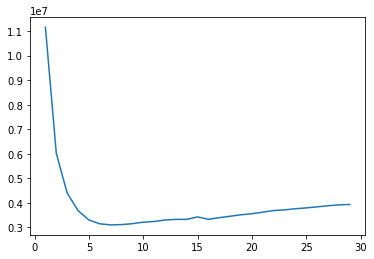

In [26]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(training_df_of_beats)
    wcss.append(kmeans.inertia_ * i)
plt.plot(range(1, 30), wcss)
plt.show()

In [27]:
kmeans = KMeans(n_clusters = wcss.index(min(wcss)), init = 'k-means++', random_state = 42)
kmeans.fit(training_df_of_beats)
all_predictions = kmeans.predict(training_df_of_beats)

In [28]:
pd.Series(all_predictions).value_counts()

0    686
1    680
4    674
5    672
3    672
2    638
dtype: int64